In [1]:
# Лабораторная работа 1

### Выполнил: Яловега Н. гр. 9308



---



# Предварительный анализ данных

## Импорт необходимых библиотек

In [3]:
import warnings
warnings.filterwarnings('always')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import random
from imblearn.over_sampling import SMOTE
%matplotlib inline

le = preprocessing.LabelEncoder()



---



## Загрузка данных в датафрейм

Так как наш набор данных в формате csv, прочитаем его следующей функцией в pandas

In [4]:
df = pd.read_csv("master.csv") 
df.head()               

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers




---



## Проверка типов данных

Здесь мы проверяем типы данных, потому что иногда цена автомобиля хранится в виде строки, поэтому следует преобразовать эту строку в целочисленные данные, только тогда возможно отобразить данные на графике. В данном случае данные уже представлены в целочисленном формате, поэтому беспокоиться не о чем.

In [5]:
df.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object



---



## Удаление нерелевантных колонок

In [6]:
df = df.drop(['country-year', 'age'], axis=1)
df.head(5)

,country,year,sex,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,21,312900,6.71,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,16,308000,5.19,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,14,289700,4.83,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,1,21800,4.59,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,9,274300,3.28,NaN,"2,156,624,900",796,Boomers




---



## Переименование столбцов

В данном случае большинство названий столбцов нечитаемы, поэтому переименуем их.

In [7]:
df = df.rename(columns={" gdp_for_year ($) ": "gdp_for_year", "gdp_per_capita ($)": "gdp_per_capita"})
df.head(5)

,country,year,sex,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,21,312900,6.71,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,16,308000,5.19,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,14,289700,4.83,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,1,21800,4.59,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,9,274300,3.28,NaN,"2,156,624,900",796,Boomers




---



## Удаление дубликатов

Большой набор данных (более 10 000 строк), часто может содержать в себе дубликаты. Например, до удаления в данном наборе было 11914 строк данных, а после удаления дубликатов 10925, таким образом набор данных содержал 989 строк дубликатов.

In [8]:
df.shape

(27820, 10)

In [9]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (4, 10)


In [10]:
df.count()      # Used to count the number of rows

country              27820
year                 27820
sex                  27820
suicides_no          27820
population           27820
suicides/100k pop    27820
HDI for year          8364
gdp_for_year         27820
gdp_per_capita       27820
generation           27820
dtype: int64

In [11]:
df = df.drop(['HDI for year'], axis = 1)
df.head(5)

,country,year,sex,suicides_no,population,suicides/100k pop,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,9,274300,3.28,"2,156,624,900",796,Boomers


In [12]:
df.count()

country              27820
year                 27820
sex                  27820
suicides_no          27820
population           27820
suicides/100k pop    27820
gdp_for_year         27820
gdp_per_capita       27820
generation           27820
dtype: int64

## Удаление пропусков

Этот шаг в основном похож на предыдущий, но здесь все отсутствующие значения определяются и отбрасываются.

In [13]:
print(df.isnull().sum())

country              0
year                 0
sex                  0
suicides_no          0
population           0
suicides/100k pop    0
gdp_for_year         0
gdp_per_capita       0
generation           0
dtype: int64


In [14]:
df = df.dropna()    # Dropping the missing values.
df.count()

country              27820
year                 27820
sex                  27820
suicides_no          27820
population           27820
suicides/100k pop    27820
gdp_for_year         27820
gdp_per_capita       27820
generation           27820
dtype: int64

Удалили все строки с пропущенными значениями (Restaurent Type и SectionViolations).

In [15]:
print(df.isnull().sum())   # After dropping the values

country              0
year                 0
sex                  0
suicides_no          0
population           0
suicides/100k pop    0
gdp_for_year         0
gdp_per_capita       0
generation           0
dtype: int64


## Замена категориальных переменных

In [16]:
df.dtypes

country               object
year                   int64
sex                   object
suicides_no            int64
population             int64
suicides/100k pop    float64
gdp_for_year          object
gdp_per_capita         int64
generation            object
dtype: object

In [17]:
df['gdp_for_year'].value_counts()


2,156,624,900      12
96,045,645,026     12
27,116,635,600     12
29,440,287,600     12
34,686,224,300     12
                   ..
390,799,991,147    10
51,338,524,831     10
125,816,640,421    10
10,546,135,160     10
11,183,458,131     10
Name: gdp_for_year, Length: 2321, dtype: int64

In [18]:
trim = lambda ss: ''.join(s for s in ss if s.isdigit())
to_int = lambda kk: int(kk)

df['gdp_for_year'] = df['gdp_for_year'].apply(trim)
df['gdp_for_year'] = df['gdp_for_year'].apply(to_int)
df.head()

,country,year,sex,suicides_no,population,suicides/100k pop,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,21,312900,6.71,2156624900,796,Generation X
1,Albania,1987,male,16,308000,5.19,2156624900,796,Silent
2,Albania,1987,female,14,289700,4.83,2156624900,796,Generation X
3,Albania,1987,male,1,21800,4.59,2156624900,796,G.I. Generation
4,Albania,1987,male,9,274300,3.28,2156624900,796,Boomers


In [19]:
df['country'] = le.fit_transform(df['country'])
df['country'].value_counts()

57    382
6     382
61    382
41    382
15    372
     ... 
14     24
17     12
27     12
54     12
59     10
Name: country, Length: 101, dtype: int64

In [20]:
df['generation'] = le.fit_transform(df['generation'])
df['generation'].value_counts()

2    6408
5    6364
4    5844
0    4990
1    2744
3    1470
Name: generation, dtype: int64

In [21]:
df.dtypes

country                int64
year                   int64
sex                   object
suicides_no            int64
population             int64
suicides/100k pop    float64
gdp_for_year           int64
gdp_per_capita         int64
generation             int64
dtype: object

In [22]:
num_replace = {'sex': {'male': 0, 'female': 1}, 
               
              }

df = df.replace(num_replace)

df.head()

,country,year,sex,suicides_no,population,suicides/100k pop,gdp_for_year,gdp_per_capita,generation
0,0,1987,0,21,312900,6.71,2156624900,796,2
1,0,1987,0,16,308000,5.19,2156624900,796,5
2,0,1987,1,14,289700,4.83,2156624900,796,2
3,0,1987,0,1,21800,4.59,2156624900,796,1
4,0,1987,0,9,274300,3.28,2156624900,796,0




---



## Определение выбросов

Выброс - это точка или набор точек, которые отличаются от других точек. Характеризуются очень высокими или очень низкими. Часто бывает полезно обнаружить и удалить выбросы. Выбросы являются одной из основных причин, приводящих к созданию менее точной модели. Метод обнаружения и удаления выбросов, примененный здесь - IQR. Часто выбросы можно увидеть с помощью визуализации, используя т.н. "ящик с усами". На всех графиках можно увидеть, что некоторые точки выходят за пределы коробки - это не что иное, как выбросы.

In [23]:
df.head()

,country,year,sex,suicides_no,population,suicides/100k pop,gdp_for_year,gdp_per_capita,generation
0,0,1987,0,21,312900,6.71,2156624900,796,2
1,0,1987,0,16,308000,5.19,2156624900,796,5
2,0,1987,1,14,289700,4.83,2156624900,796,2
3,0,1987,0,1,21800,4.59,2156624900,796,1
4,0,1987,0,9,274300,3.28,2156624900,796,0


2.0


<AxesSubplot:xlabel='generation'>

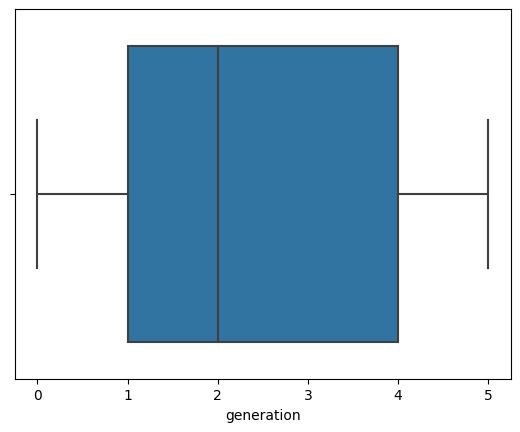

In [24]:
print(df['generation'].median())
sns.boxplot(x=df['generation'])

In [25]:
columns_int = df.select_dtypes(include=["int64", "float64"])

In [26]:
for x in columns_int:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan

In [27]:
df.isnull().sum()

country                 0
year                    0
sex                     0
suicides_no          3909
population           4180
suicides/100k pop    2046
gdp_for_year         3586
gdp_per_capita       1016
generation              0
dtype: int64

In [28]:
df = df.dropna()
df.isnull().sum()

country              0
year                 0
sex                  0
suicides_no          0
population           0
suicides/100k pop    0
gdp_for_year         0
gdp_per_capita       0
generation           0
dtype: int64



---



## Нормализация данных

In [29]:
cdf = df
cdf = (df-df.min ())/(df.max ()-df.min ())
scaled_df = cdf

In [30]:
scaled_df

,country,year,sex,suicides_no,population,suicides/100k pop,gdp_for_year,gdp_per_capita,generation
0,0.0,0.064516,0.0,0.065015,0.087605,0.167082,0.003332,0.009632,0.4
1,0.0,0.064516,0.0,0.049536,0.086232,0.129233,0.003332,0.009632,1.0
2,0.0,0.064516,1.0,0.043344,0.081104,0.120269,0.003332,0.009632,0.4
3,0.0,0.064516,0.0,0.003096,0.006031,0.114293,0.003332,0.009632,0.2
4,0.0,0.064516,0.0,0.027864,0.076789,0.081673,0.003332,0.009632,0.0
...,...,...,...,...,...,...,...,...,...
27814,1.0,0.935484,1.0,0.501548,0.766413,0.147410,0.099535,0.036372,0.8
27816,1.0,0.935484,1.0,0.027864,0.097572,0.064243,0.099535,0.036372,1.0
27817,1.0,0.935484,0.0,0.185759,0.773956,0.054034,0.099535,0.036372,0.6
27818,1.0,0.935484,1.0,0.136223,0.737370,0.041584,0.099535,0.036372,0.6


## Тепловые карты

Тепловые карты - это тип графика, который необходим для поиска зависимых переменных. Один из лучших способов найти взаимосвязь между характеристиками: тепловые карты.

<AxesSubplot:>

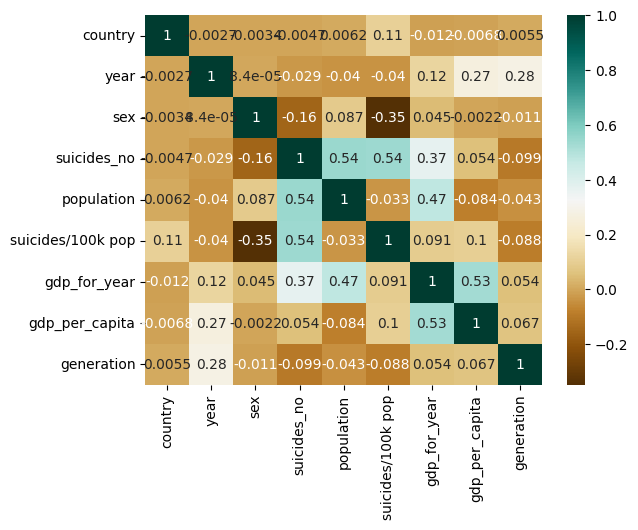

In [31]:
sns.heatmap(scaled_df.corr(),cmap="BrBG",annot=True)

<AxesSubplot:>

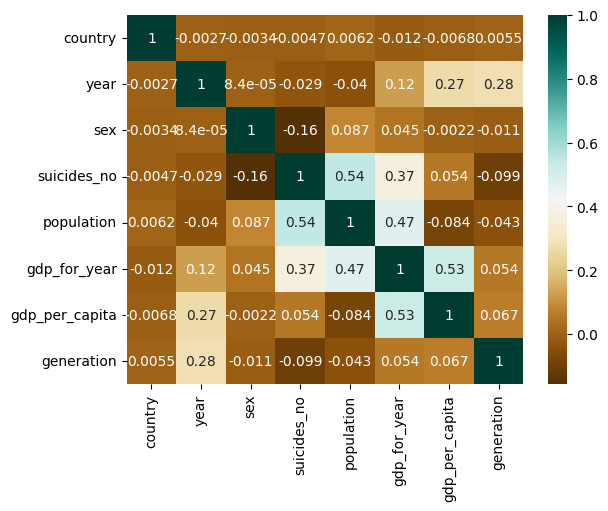

In [32]:
df = df.drop(columns=["suicides/100k pop"])
# df = df.drop(columns = ["suicides/100k pop"])
cdf = df
cdf = (df-df.min ())/(df.max ()-df.min ())
scaled_df = cdf
sns.heatmap(scaled_df.corr(),cmap="BrBG",annot=True)

## Построение моделей

In [33]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold, RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import numpy as np

In [34]:
data_final = scaled_df

In [35]:
X = data_final.loc[:, data_final.columns != 'generation']
y = df.loc[:, df.columns == 'generation']

### Дисбаланс классов

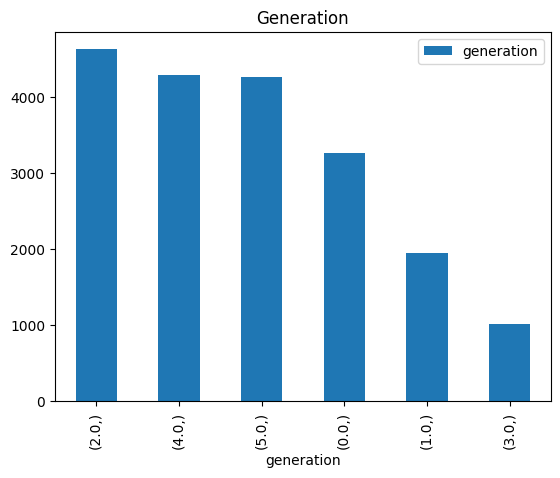

In [36]:
y.value_counts().plot(kind='bar', label='generation')
plt.legend()
plt.title('Generation');

In [37]:
sm=SMOTE()
X,y=sm.fit_resample(X,y)

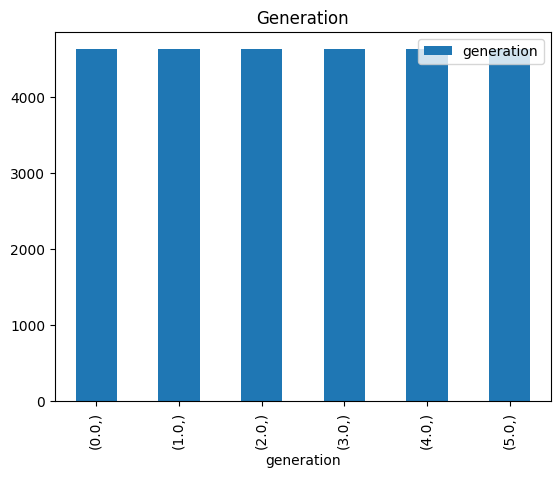

In [38]:
y.value_counts().plot(kind='bar', label='generation')
plt.legend()
plt.title('Generation');

In [39]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [40]:
logreg = LogisticRegression(random_state = 0, max_iter=1000)
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()
svc = SVC()
nb = BernoulliNB()
rt = RandomForestClassifier(n_estimators=100,
                               bootstrap = True,
                               max_features = 'sqrt')
xgbx = xgb.XGBClassifier()

models = [logreg, knn, svc, nb, dt, rt, xgbx]

In [41]:
for model in models:
    model.fit(X_train, y_train.values.ravel())

In [42]:
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, roc_curve

In [43]:
for model in models:
    print(model)
    y_pred = model.predict(X_test)
    
    print(classification_report(y_test, y_pred.round(0)))
    cf_matrix = confusion_matrix(y_pred.round(0), y_test)
    print(cf_matrix)
    

LogisticRegression(max_iter=1000, random_state=0)
              precision    recall  f1-score   support

         0.0       0.40      0.25      0.31      1526
         1.0       0.53      0.77      0.63      1533
         2.0       0.30      0.16      0.21      1528
         3.0       0.59      0.95      0.73      1497
         4.0       0.47      0.36      0.41      1588
         5.0       0.31      0.32      0.31      1488

    accuracy                           0.47      9160
   macro avg       0.43      0.47      0.43      9160
weighted avg       0.43      0.47      0.43      9160

[[ 379   53  246    0   72  187]
 [ 362 1180  374    0   88  228]
 [ 184  105  244    0  169  120]
 [ 184    0  158 1425  367  275]
 [ 185   14  210   37  572  203]
 [ 232  181  296   35  320  475]]
KNeighborsClassifier()
              precision    recall  f1-score   support

         0.0       0.48      0.60      0.53      1526
         1.0       0.72      0.87      0.79      1533
         2.0       0.5

In [44]:
logreg.predict_proba(X_test)[3,1]

0.013623512413292958

LogisticRegression(max_iter=1000, random_state=0)


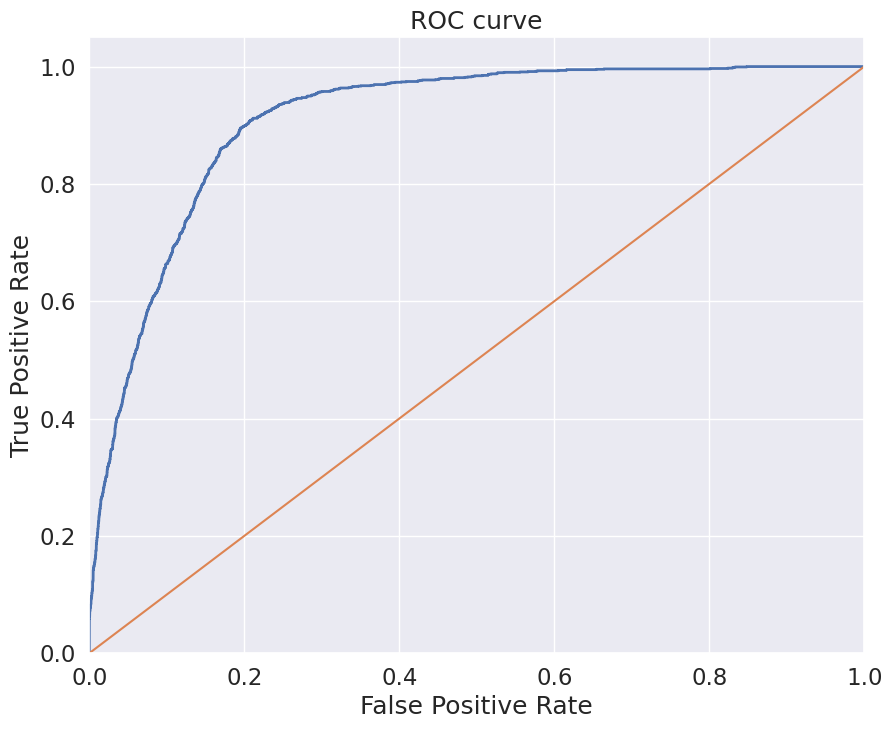

KNeighborsClassifier()


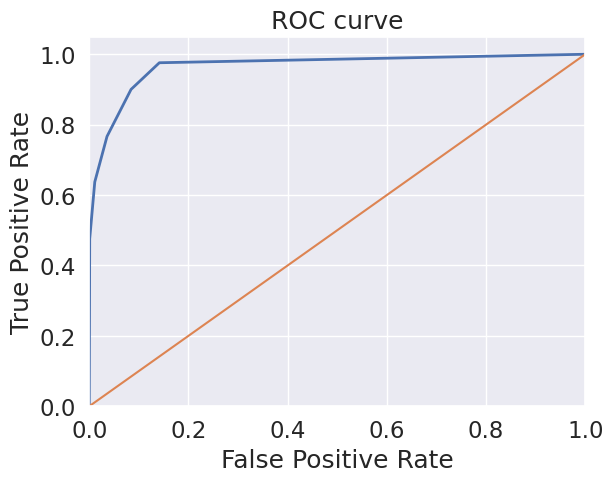

BernoulliNB()


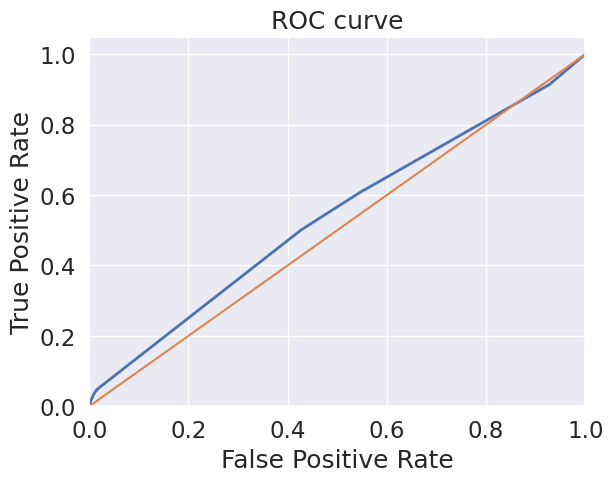

DecisionTreeClassifier()


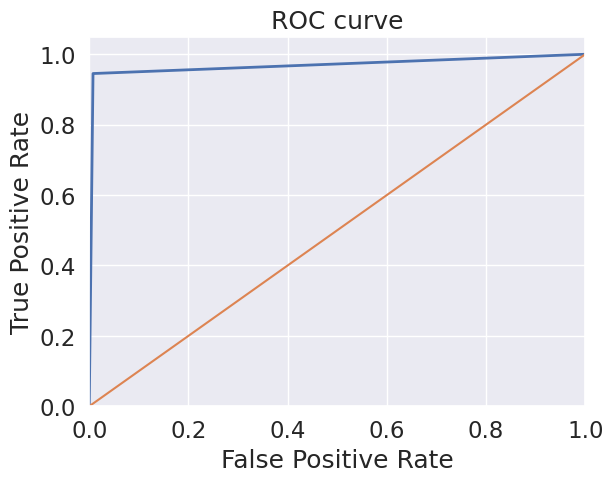

RandomForestClassifier()


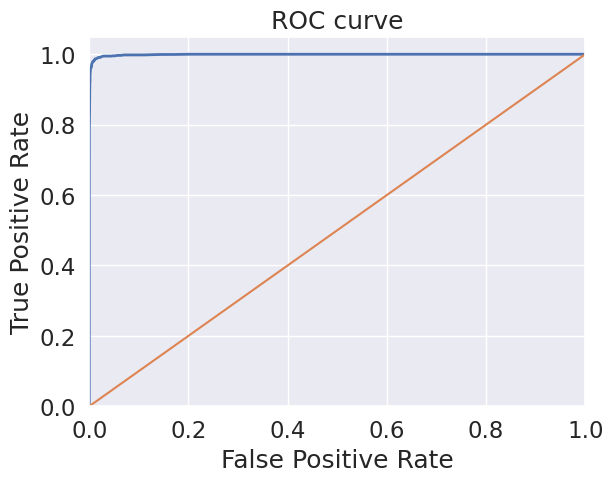

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', ...)


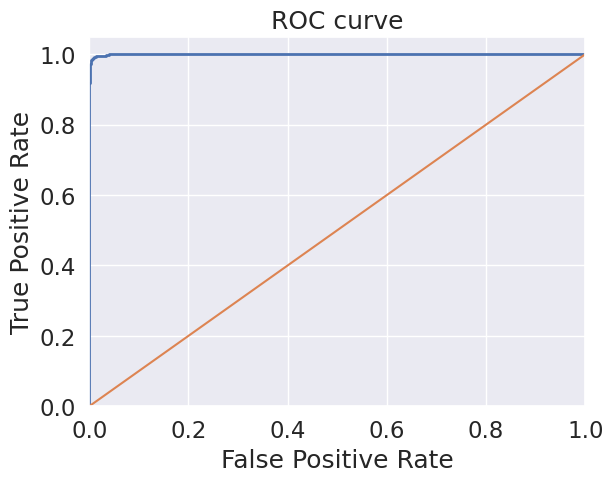

In [45]:
models = [logreg, knn, nb, dt, rt, xgbx]
sns.set(font_scale=1.5)
sns.set_color_codes("muted")

plt.figure(figsize=(10, 8))
for model in models:
    print(model)
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1], pos_label=1)
    lw = 2
    plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
    plt.plot([0, 1], [0, 1])
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    plt.show()

Данные размножабтся простым копированием. Рандом форест запомнил.)))

## Важность признаков

population        0.280773
year              0.204941
suicides_no       0.165686
gdp_for_year      0.129933
gdp_per_capita    0.113876
country           0.081892
sex               0.022899
dtype: float64

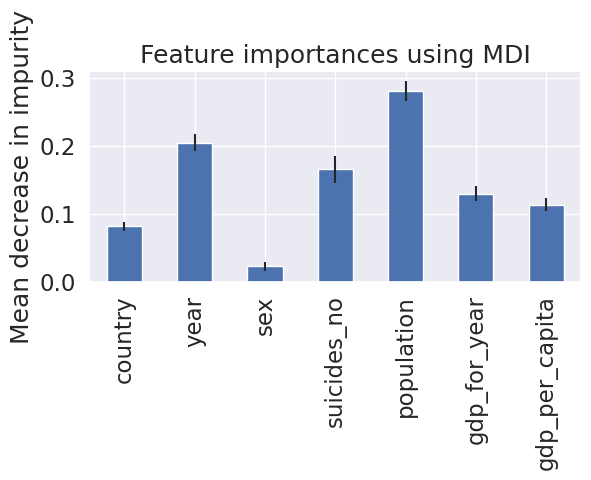

In [50]:
feature_names = feature_names = X_train.columns

importances = rt.feature_importances_
std = np.std([tree.feature_importances_ for tree in rt.estimators_], axis=0)
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

feature_scores = pd.Series(rt.feature_importances_, index=feature_names).sort_values(ascending=False)

feature_scores

year              0.355968
suicides_no       0.149302
gdp_for_year      0.115627
population        0.110195
sex               0.108892
gdp_per_capita    0.092167
country           0.067850
dtype: float32

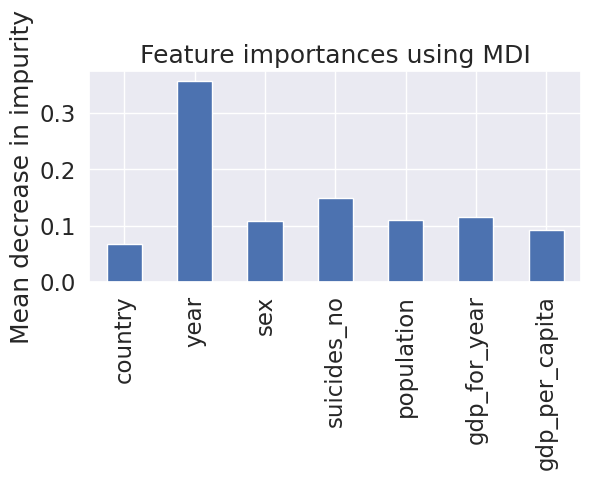

In [51]:
feature_names = feature_names = X_train.columns

importances = xgbx.feature_importances_
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

feature_scores = pd.Series(xgbx.feature_importances_, index=feature_names).sort_values(ascending=False)

feature_scores

## Визуализация дерева решений

In [52]:
from sklearn import tree

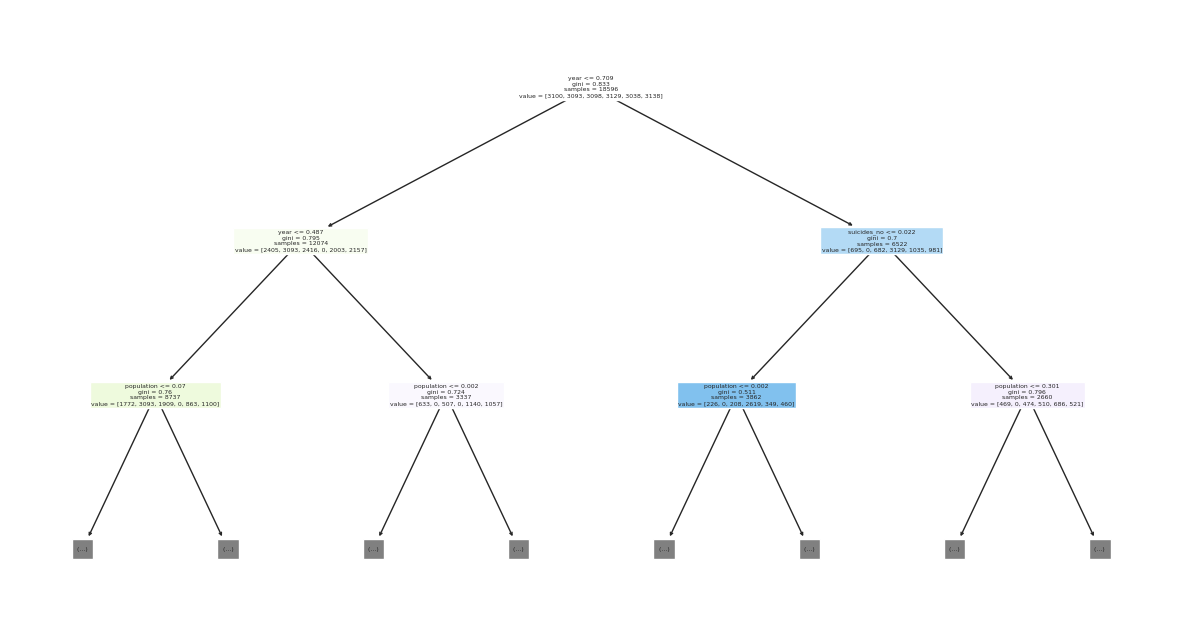

In [53]:
plt.figure(figsize=(15, 8))
tree.plot_tree(dt,
               max_depth = 2,
               feature_names = feature_names.tolist(), 
               filled = True);
plt.show()

## GridSearch

In [54]:
from datetime import datetime
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Затрачено времени: %i часов %i минут и %s секунд.' % (thour, tmin, round(tsec, 2)))

### Случайный лес

In [55]:
from sklearn.model_selection import GridSearchCV

params_rfc = { 
    'random_state' : [42],
    'n_estimators': [100],
    #'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [10],
    'criterion' : ['entropy']
}
rfc=RandomForestClassifier()
random_search = GridSearchCV(estimator=rfc, param_grid=params_rfc, cv=2, n_jobs=-1)
start_time = timer(None)
random_search.fit(X_train, y_train.values.ravel())
timer(start_time)
print(random_search.best_params_)
print(random_search.best_score_)
rf_bp_rfc = random_search.best_params_


 Затрачено времени: 0 часов 0 минут и 5.38 секунд.
{'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 100, 'random_state': 42}
0.7042912454291246


### Логистическая регрессия

In [56]:
params_rfc = { 
    'max_iter' : [200, 1000, 3000],
    'random_state' : [0, 10, 100, 250, None],
}

logreg = LogisticRegression()
random_search = GridSearchCV(estimator=logreg, param_grid=params_rfc, cv=2, n_jobs=-1)
start_time = timer(None)
random_search.fit(X_train, y_train.values.ravel())
timer(start_time)
print(random_search.best_params_)
print(random_search.best_score_)
rf_bp_logreg = random_search.best_params_


 Затрачено времени: 0 часов 0 минут и 3.45 секунд.
{'max_iter': 200, 'random_state': 0}
0.46397074639707464


### Дерево решений

In [57]:
params_rfc = { 
    'max_depth' : [5, 10, 50, None],      # Макс. глубина
    'random_state' : [0, 10, 100, 250, None],
    'splitter': ["best", "random"],
}

dt = DecisionTreeClassifier()
random_search = GridSearchCV(estimator=dt, param_grid=params_rfc, cv=2, n_jobs=-1)
start_time = timer(None)
random_search.fit(X_train, y_train.values.ravel())
timer(start_time)
print(random_search.best_params_)
print(random_search.best_score_)
rf_bp_dt = random_search.best_params_


 Затрачено времени: 0 часов 0 минут и 0.65 секунд.
{'max_depth': 50, 'random_state': 0, 'splitter': 'best'}
0.7218218971821897


### К-ближайшие соседи

In [58]:
params_rfc = { 
    'n_neighbors' : [2, 5, 10, 15],
    'weights': ['uniform', 'distance'],
}

knn = KNeighborsClassifier()
random_search = GridSearchCV(estimator=knn, param_grid=params_rfc, cv=2, n_jobs=-1)
start_time = timer(None)
random_search.fit(X_train, y_train.values.ravel())
timer(start_time)
print(random_search.best_params_)
print(random_search.best_score_)
rf_bp_knn = random_search.best_params_


 Затрачено времени: 0 часов 0 минут и 1.03 секунд.
{'n_neighbors': 2, 'weights': 'distance'}
0.6127124112712412


### XGBoost

In [59]:
params_boost = {
        'learning_rate': [0.17], 
        'nthread': [2], 
        'random_state': [101],
        'min_child_weight': [5],
        'gamma': [1],
        'subsample': [1.0],
        'colsample_bytree': [0.6],
        'max_depth': [100],
        'n_estimators': [100]
        }

xgbb = xgb.XGBClassifier(objective='binary:logistic')
folds = 5
param_comb = 5
skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 10)

# n_jobs = -1
random_search = GridSearchCV(estimator=xgbb, param_grid=params_boost, cv=2, n_jobs=-1)
start_time = timer(None) 
random_search.fit(X_train, y_train.values.ravel())
timer(start_time)
print(random_search.best_params_)
print(random_search.best_score_)
rf_bp_xgb = random_search.best_params_


 Затрачено времени: 0 часов 0 минут и 19.84 секунд.
{'colsample_bytree': 0.6, 'gamma': 1, 'learning_rate': 0.17, 'max_depth': 100, 'min_child_weight': 5, 'n_estimators': 100, 'nthread': 2, 'random_state': 101, 'subsample': 1.0}
0.8163045816304582


In [60]:
logreg = LogisticRegression(**rf_bp_logreg)
dt = DecisionTreeClassifier(**rf_bp_dt)
rt = RandomForestClassifier(**rf_bp_rfc)
knn = KNeighborsClassifier(**rf_bp_knn)
xgbx = xgb.XGBClassifier(objective='binary:logistic', **rf_bp_xgb)
models = [logreg, dt, rt, knn, xgbx]

for model in models:
    print(model)
    if model in [svc, nb]:
        model.fit(X_train_sc, y_train.values.ravel())
        y_pred = model.predict(X_test_sc)
    else:
        model.fit(X_train, y_train.values.ravel())
        y_pred = model.predict(X_test)
    
    print(classification_report(y_test, y_pred.round(0)))
    cf_matrix = confusion_matrix(y_pred.round(0), y_test)
    print(cf_matrix)
    
models = [logreg, dt, rt, knn]

LogisticRegression(max_iter=200, random_state=0)
              precision    recall  f1-score   support

         0.0       0.40      0.25      0.31      1526
         1.0       0.53      0.77      0.63      1533
         2.0       0.30      0.16      0.21      1528
         3.0       0.59      0.95      0.73      1497
         4.0       0.47      0.36      0.41      1588
         5.0       0.31      0.32      0.31      1488

    accuracy                           0.47      9160
   macro avg       0.43      0.47      0.43      9160
weighted avg       0.43      0.47      0.43      9160

[[ 379   53  246    0   72  187]
 [ 362 1180  374    0   88  228]
 [ 184  105  244    0  169  120]
 [ 184    0  158 1425  367  275]
 [ 185   14  210   37  572  203]
 [ 232  181  296   35  320  475]]
DecisionTreeClassifier(max_depth=50, random_state=0)
              precision    recall  f1-score   support

         0.0       0.71      0.73      0.72      1526
         1.0       0.96      0.95      0.95    